In [3]:
Copyright (c) [2018] [Prabhash Kumar Jha and Isheeta Jha] 



using Images
using PyPlot
using Interpolations
using Optim
using Distributions
using LineSearches

include("studentt.jl"); 
include("mrf_prior.jl");

#
# negative log-likelihood
#
function mrf_denoising_nllh(x::Array{Float64,2}, y::Array{Float64, 2}, sigma)
    
    likelihood=zeros(x)
    likelihood=-((x-y).^2)./(2*sigma^2)
    nlikelihood= - likelihood
    
end

#
# gradient of negative log-likelihood
#
function grad_mrf_denoise_nllh(x::Array{Float64,2}, y::Array{Float64,2}, sigma)
    
    gradlikelihood=zeros(x)
    gradlikelihood=-(x-y)/(sigma^2);   
    ngll=-gradlikelihood
    
end

#
# negative log-posterior
#
function mrf_denoise_nlposterior(x::Array{Float64,2},y::Array{Float64,2}, sigma1, sigma2, alpha)
    
   
    lprior=mrf_log_prior(x, sigma2, alpha)
    nlprior=-lprior
    nllikelihood=mrf_denoising_nllh(x, y, sigma1)
    nlpost=nlprior+nllikelihood
end

#
# gradient of negative log-posterior
#
function grad_mrf_denoise_nlposterior(x::Array{Float64,2}, y::Array{Float64,2}, sigma1, sigma2, alpha)
    
    
    glprior=grad_mrf_log_prior(x, sigma2, alpha)
    nglprior=-glprior
    
    ngll=grad_mrf_denoise_nllh(x, y, sigma1)
    nlpost=nglprior+ngll
end

#
# denoising algorithm
#
function denoise(y, sigma_noise, sigma, alpha)
   
    
    x_init=y;
    right = y;
   
    function f(x)
        return sum(mrf_denoise_nlposterior(x,right,sigma_noise,sigma,alpha));  # to maximise the post or to minimise the minus post what should b the params given by elemnts of k
    end

    function g!(storage, x)
        dx = grad_mrf_denoise_nlposterior(x,right,sigma_noise,sigma,alpha);
        storage[:] = dx[:];
    end
    
    options = Optim.Options(iterations=5000, show_trace=false);#,allow_f_increases=true);
    result = optimize(f, g!, x_init, GradientDescent(linesearch=StrongWolfe()), options);
   
    return reshape(Optim.minimizer(result), size(y));
   
end

#
# PSNR
#
function psnr(gt,x)
    
    ms=(gt-x).^2
    mss=sum(ms)
    MSE=mss/(size(gt,1)*size(gt,2))
    vm=255
    
    PSNR=10*log10((vm^2)/MSE)
    
    return PSNR
end



psnr (generic function with 1 method)

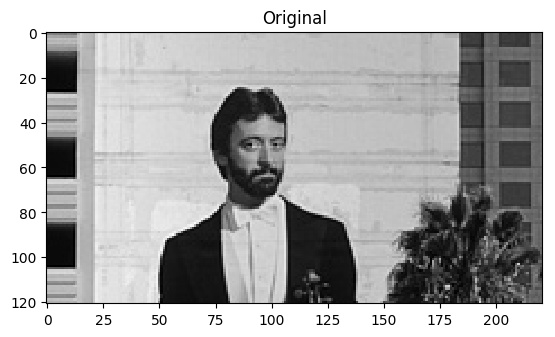

PyObject Text(0.5,1,'Original')

[Task 1] Denoising


In [4]:

 
println("[Task 1] Denoising");

# loading a sample image
  la = PyPlot.imread("la.png")  
  figure()
  PyPlot.imshow(la,"gray") 
  title("Original")
 

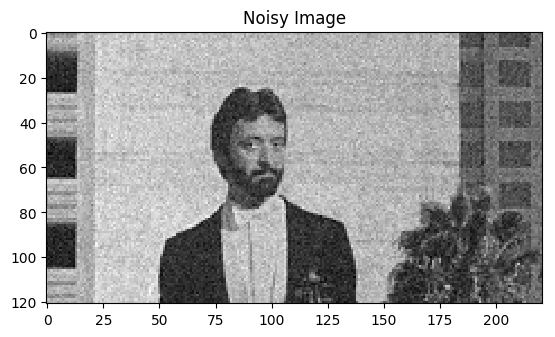

PSNR: of noisy image 24.581971112659907


In [5]:
 la=la.*255  # normalise between 0 and 255
  
  noise=randn(size(la,1),size(la,2))*15  # noise with standard deviation 15
  


  # add Gaussian noise to la
  la_noise=la+noise
  figure()
  PyPlot.imshow(la_noise,"gray")
  title("Noisy Image")
  println("PSNR: of noisy image ", psnr(la, la_noise));  

 

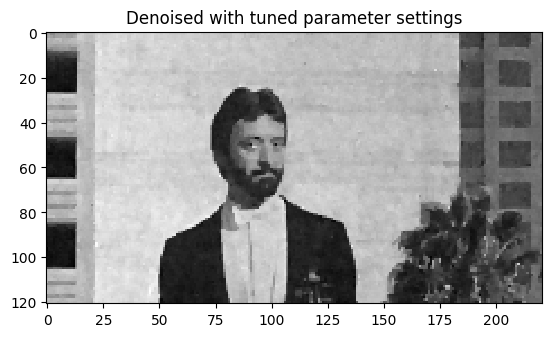

PSNR: of denoised image with tuned parameter settings 30.13954591192703


In [6]:
 #
  # Study the effect of parameters on the denoising
  #
    sigma_noise = 15  # fixed
    sigma = 10    # this sigma and alpha paur gives good result with high PSNR
    alpha =0.56  

    la_denoised = denoise(la_noise, sigma_noise, sigma, alpha);
    figure()
    PyPlot.imshow(la_denoised,"gray")
    title("Denoised with tuned parameter settings")
    println("PSNR: of denoised image with tuned parameter settings ", psnr(la, la_denoised));
    
   


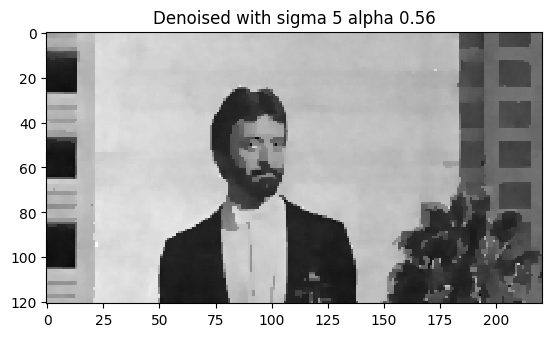

PSNR: of denoised image with sigma 5 alpha 0.56  29.53288466062759


In [7]:
 
    ## another paramter setting##
    
    sigma =5 ##  This sigma and alpha pair smoothens image
    alpha =0.56  
  
    la_denoised = denoise(la_noise, sigma_noise, sigma, alpha);
    figure()
    PyPlot.imshow(la_denoised,"gray")
    title("Denoised with sigma 5 alpha 0.56")
    println("PSNR: of denoised image with sigma 5 alpha 0.56  ", psnr(la, la_denoised));
    
    ## another paramter setting end ##

